Reporte por clase:

              precision    recall  f1-score   support

           A       0.57      0.73      0.64       145
           N       0.96      0.92      0.94       965

    accuracy                           0.89      1110
   macro avg       0.76      0.82      0.79      1110
weighted avg       0.91      0.89      0.90      1110

Métricas globales:
Accuracy : 0.8919
Precision: 0.9067
Recall   : 0.8919
F1-Score : 0.8975


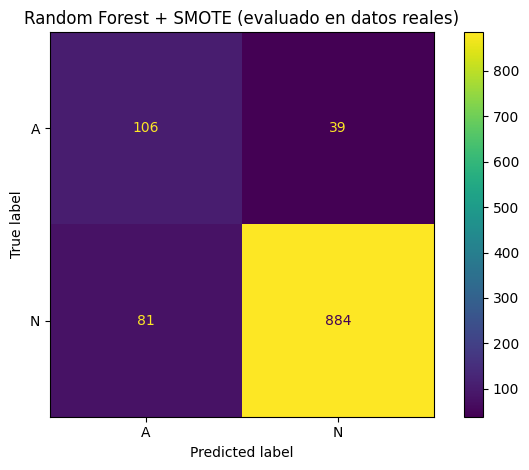

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("../data/ecg_rr_features_curado.csv")  # Ajusta si es necesario

# Separar características y etiquetas
X = df.drop(columns=["record", "label"])
y = df["label"]

# Dividir antes de aplicar SMOTE (para evaluar en datos reales)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Predicciones
y_pred = clf.predict(X_test)

# Reporte por clase
print("Reporte por clase:\n")
print(classification_report(y_test, y_pred))

# Métricas globales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Métricas globales:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Random Forest + SMOTE (evaluado en datos reales)")
plt.tight_layout()
plt.show()
